In [241]:
%matplotlib inline

In [240]:
import pylab as plt
from astrometry.util.fits import fits_table, merge_tables
from glob import glob
import numpy as np
from astrometry.libkd.spherematch import match_radec
import fitsio
import os

In [186]:
fns = glob('/data/CFIS/catalogs-dr2/CFIS.*.fits')
fns.sort()
len(fns)

31015

In [187]:
grid1,grid2 = [],[]
for fn in fns:
    words = fn.split('.')
    grid1.append(int(words[-3], 10))
    grid2.append(int(words[-2], 10))

In [188]:
Tr = fits_table('data/cfis-r/cfis-tiles.fits')

In [224]:
u1 = fits_table('data/cfis-u/cfis-tiles-u-1.fits')
u2 = fits_table('data/cfis-u/cfis-tiles-u-2.fits')
u = merge_tables([u1,u2])
I = np.lexsort((u.grid2, u.grid1))
u.cut(I)
u.filename = np.array(['tiles-dr2/'+fn for fn in u.filename])
u.writeto('data/cfis-u/cfis-tiles-u.fits')

In [215]:
Tu = fits_table('data/cfis-u/cfis-tiles-u.fits')

In [216]:
len(Tr)

12621

In [217]:
len(Tu)

27291

In [229]:
Tr.gr1 = np.array([int(x,10) for x in Tr.grid1])
Tr.gr2 = np.array([int(x,10) for x in Tr.grid2])
Tu.gr1 = np.array([int(x,10) for x in Tu.grid1])
Tu.gr2 = np.array([int(x,10) for x in Tu.grid2])

In [230]:
grid = set(list(zip(Tr.gr1, Tr.gr2)))
grid.update(list(zip(Tu.gr1, Tu.gr2)))

In [234]:
Tboth = merge_tables([Tr, Tu])
_,I = np.unique(Tboth.gr1 * 1000 + Tboth.gr2, return_index=True)
len(I)

31077

In [235]:
Tboth.cut(I)

In [237]:
Tboth.delete_column('exptime')
Tboth.delete_column('filename')
Tboth.delete_column('filter')
Tboth.delete_column('gain')
Tboth.delete_column('iqfinal')
Tboth.delete_column('saturate')

In [238]:
Tboth.writeto('data/cfis-tiles-cat.fits')

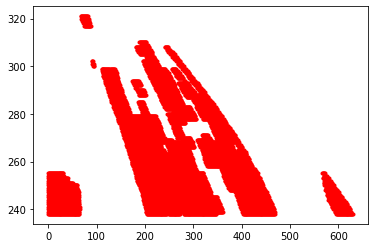

In [221]:
plt.plot(Tr.gr1, Tr.gr2, 'r.');

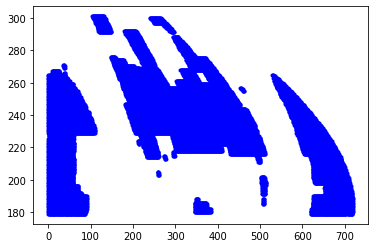

In [222]:
plt.plot(Tu.gr1, Tu.gr2, 'b.');

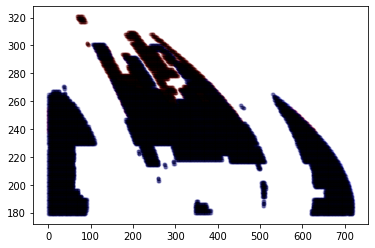

In [223]:
plt.plot(Tr.gr1, Tr.gr2, 'r.', alpha=0.1);
plt.plot(Tu.gr1, Tu.gr2, 'b.', alpha=0.1);
plt.plot(grid1, grid2, 'k.', alpha=0.1);

In [242]:
T = fits_table('data/cfis-u/cfis-tiles.kd.fits')

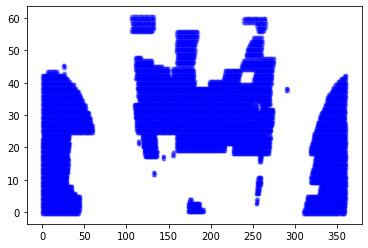

In [243]:
plt.plot(T.crval1, T.crval2, 'b.', alpha=0.2);

In [339]:
zoom = 6

In [340]:
B1 = fits_table('data/bricks-%i.fits' % zoom)
#B1.cut((B1.dec >= -30) * (B1.dec <= 90))
namemap = dict([(str(bn),i) for i,bn in enumerate(B1.brickname)])
len(B1)

193

In [344]:
fns = glob('data/scaled/cfis-u/%iU/*/cfis*.fits' % zoom)
fns.sort()
print(len(fns), 'files')
bns = [fn.split('-')[2] for fn in fns]
I = np.array([namemap[bn] for bn in bns])
C1 = B1[I]
#len(C1), 'bricks'
C1.writeto('data/cfis-u/bricks-%i.fits' % zoom)

60 files


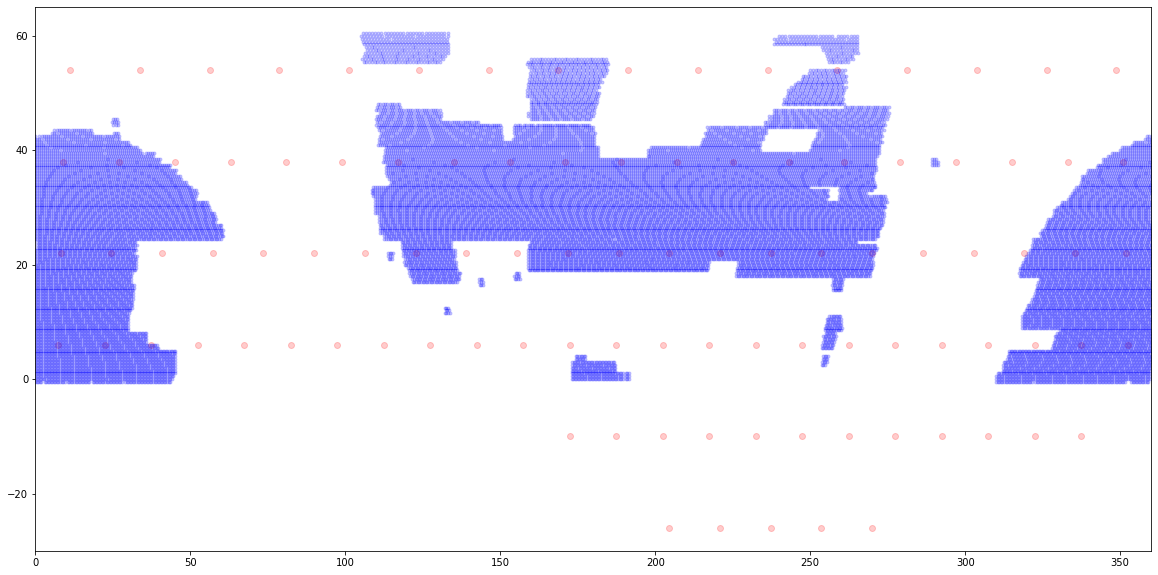

In [342]:
plt.figure(figsize=(20,10))
plt.plot(C1.ra, C1.dec, 'ro', alpha=0.2);
plt.plot(T.crval1, T.crval2, 'b.', alpha=0.2);
plt.axis([0,360,-30,65]);

In [343]:
# Delete empty scaled images.
if True:
    for fn in fns:
        st = os.stat(fn)
        if st.st_size > 700000:
            #print(fn, 'size', st.st_size)
            continue
        img = fitsio.read(fn, ext=1)
        mn,mx = img.min(), img.max()
        print(fn, 'size', st.st_size, 'range', mn, mx)
        if mn == 0. and mx == 0.:
            os.remove(fn)

data/scaled/cfis-u/6U/011/cfis-0112p540-U.fits size 691200 range 0.0 0.0
data/scaled/cfis-u/6U/015/cfis-0150p700-U.fits size 691200 range 0.0 0.0
data/scaled/cfis-u/6U/030/cfis-0300p860-U.fits size 691200 range 0.0 0.0
data/scaled/cfis-u/6U/045/cfis-0450p700-U.fits size 691200 range 0.0 0.0
data/scaled/cfis-u/6U/056/cfis-0562p540-U.fits size 691200 range 0.0 0.0
data/scaled/cfis-u/6U/067/cfis-0675p060-U.fits size 691200 range 0.0 0.0
data/scaled/cfis-u/6U/073/cfis-0736p220-U.fits size 691200 range 0.0 0.0
data/scaled/cfis-u/6U/075/cfis-0750p700-U.fits size 691200 range 0.0 0.0
data/scaled/cfis-u/6U/078/cfis-0787p540-U.fits size 691200 range 0.0 0.0
data/scaled/cfis-u/6U/081/cfis-0810p380-U.fits size 691200 range 0.0 0.0
data/scaled/cfis-u/6U/082/cfis-0825p060-U.fits size 691200 range 0.0 0.0
data/scaled/cfis-u/6U/090/cfis-0900p220-U.fits size 691200 range 0.0 0.0
data/scaled/cfis-u/6U/090/cfis-0900p860-U.fits size 691200 range 0.0 0.0
data/scaled/cfis-u/6U/097/cfis-0975p060-U.fits size

In [ ]:
plt.plot(C1.ra, C1.dec, 'r.', alpha=0.2);

In [83]:
row = B1[B1.dec == 29.0]
len(row)

632

In [68]:
row.brickname[(row.ra > 230) * (row.ra < 240)]

array(['2304p290', '2309p290', '2315p290', '2321p290', '2326p290',
       '2332p290', '2338p290', '2343p290', '2349p290', '2355p290',
       '2361p290', '2366p290', '2372p290', '2378p290', '2383p290',
       '2389p290', '2395p290'], dtype='<U8')

In [73]:
r = ((10000. * 0.186/3600) + (5300 * 0.186*2/3600.)) / 2. * np.sqrt(2)
print(r)
I,J,d = match_radec(B1.ra, B1.dec, T.crval1, T.crval2, r)
print(len(d), 'matches')

0.7525973174428822
23785 matches


In [74]:
len(np.unique(I)), len(np.unique(J))

(3557, 12621)

In [75]:
T.ra1 = T.crval1 - 0.186*5000/3600. / np.cos(np.deg2rad(T.crval2))
T.ra2 = T.crval1 + 0.186*5000/3600. / np.cos(np.deg2rad(T.crval2))
T.dec1 = T.crval2 - 0.186*5000/3600.
T.dec2 = T.crval2 + 0.186*5000/3600.

In [76]:
keep = np.flatnonzero((T.ra1 [J] < B1.ra2 [I]) *
                      (T.dec1[J] < B1.dec2[I]) *
                      (T.ra2[J]  > B1.ra1 [I]) *
                      (T.dec2[J] > B1.dec1[I]))
len(I), len(keep)

(23785, 23700)

In [77]:
len(np.unique(I[keep]))

3556